# CÂU 1

*Câu hỏi:* Đâu là top 5 thành phố có mật độ ô nhiễm cao nhất, thấp nhất trong 5 năm 2017 - 2021? Với mỗi thành phố cao nhất, thấp nhất trong năm 2021 mật độ ô nhiễm biến đổi như thế nào theo các tháng? Thử giải thích

*Ý nghĩa:* Nhằm xác định được những thành phố nào đã đạt được mức độ ô nhiễm đáng báo động vô cùng trong những năm vừa qua, cũng như những quốc gia đã giữ được sự trong sạch của không khí. Thông qua đó có thể biểu diễn được cụ thể quá trình biến đổi chất lượng không khí trong suốt 12 tháng của năm gần đây nhất, để xem thử có sự biến động nào đặc biệt xảy ra đối với 2 thành phố cao nhất và thấp nhất không.

***Đọc dữ liệu và xử lý để trả lời câu hỏi***

In [1]:
#import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = './air_quality/dataset/airdata6years.csv'
df = pd.read_csv(path)

df = df.drop('Unnamed: 0', axis = 1)
df.head()

,Rank,City,Country,Year_2021,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year_2020,Year_2019,Year_2018,Year_2017
0,1,Bhiwadi,India,106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,NaN
1,2,Ghaziabad,India,102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163.0,106.6,110.2,135.2,144.6
2,3,Hotan,China,101.5,NaN,NaN,158.0,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116.0,91.9
3,4,Delhi,India,96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,Jaunpur,India,95.3,182.2,143.5,91.0,70.0,51.1,40.7,33.5,34.2,36.8,75.7,196.0,195.7,NaN,NaN,NaN,NaN


Đưa ra bảng thống kê và vẽ biểu đồ thể hiện biến động

***1/ Thống kê thành phố có tỷ lệ ô nhiễm cao nhất, thấp nhất***

Vì mỗi cột số liệu đều chứa giá trị nan nên sẽ thực hiện thay các giá trị này bằng trung vị (median) ở cell bên dưới. Do số lượng giá trị nan tương đối nhiều nên việc thay bằng giá trị median có tính hợp lý hơn là 0 hoặc mean vì sẽ ảnh hưởng tới dữ liệu

In [3]:
#Liệt kê những cột kiểu dữ liệu số trong df
numberic_cols = ['Year_2021', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
                'Year_2020', 'Year_2019', 'Year_2018', 'Year_2017']

#Lặp những cột số để thay đổi nan bằng median
for i in numberic_cols:
    med = df[i].median() #giá trị median của mỗi cột
    df[i] = df[i].fillna(med)

*Định nghĩa hàm tìm cần thiết:*

In [4]:
#Hàm tìm top 5 thành phố có giá trị lớn nhất
def findMax5City(df, year):
    year_col = f'Year_{year}'
    
    index = df[year_col].sort_values(ascending = False)[:5].index #Vị trí 5 thành phố cao nhất
    
    city = df['City'].loc[index].values #5 thành phố cao nhất
    
    #Danh sách để trả về series, gồm năm và 5 thành phố
    lst = np.insert(city, 0, year)
    
    return pd.Series(lst)

#Hàm tìm top 5 thành phố có giá trị nhỏ nhất
def findMin5City(df, year):
    year_col = f'Year_{year}'
    
    index = df[year_col].sort_values(ascending = True)[:5].index #Vị trí 5 thành phố nhỏ nhất
    
    city = df['City'].loc[index].values #5 thành phố nhỏ nhất
    
    #Danh sách để trả về series, gồm năm và 5 thành phố
    lst = np.insert(city, 0, year)
    
    return pd.Series(lst)

*Lập 2 bảng thống kê:*

In [5]:
#Danh sách các năm
years = [2017, 2018, 2019, 2020, 2021]
years = np.array(years)

#Danh sách các series để tạo thành bảng 
lst_min_value = []
lst_max_value = []

### Min
for i in years: #Lặp qua từng năm
    lst_min_value.append(findMin5City(df, i))

#Tạo mmin_df và đổi tên cột
min_df = pd.DataFrame(lst_min_value)

min_df = min_df.rename(columns = {0 : 'Year', 1 : 'Top 1', 2 : 'Top 2', 3 : 'Top 3', 4 : 'Top 4', 5 : 'Top 5'})

min_df = min_df.set_index('Year')

print('TOP 5 MIN CITY')
print(min_df)
print('\n')


### Max
for i in years: #Lặp qua từng năm
    lst_max_value.append(findMax5City(df, i))

#Tạo mmin_df và đổi tên cột
max_df = pd.DataFrame(lst_max_value)

max_df = max_df.rename(columns = {0 : 'Year', 1 : 'Top 1', 2 : 'Top 2', 3 : 'Top 3', 4 : 'Top 4', 5 : 'Top 5'})

max_df = max_df.set_index('Year')

print('TOP 5 MAX CITY')
print(max_df)


TOP 5 MIN CITY
            Top 1         Top 2      Top 3        Top 4        Top 5
Year                                                                
2017    Bredkalen       Judbury  Emu River  Bream Creak       Exeter
2018      Judbury     Emu River  St Helens   Oak Harbor   Mornington
2019  Kailua-Kona  Captain Cook     Waimea    St Helens    Emu River
2020       Waimea       Judbury  St Helens    Emu River  Kailua-Kona
2021          Chu     St Helens    Judbury    Emu River   Mornington


TOP 5 MAX CITY
          Top 1      Top 2        Top 3      Top 4    Top 5
Year                                                       
2017   Gurugram  Ghaziabad        Noida     Lahore     Jind
2018   Gurugram  Ghaziabad   Faisalabad  Faridabad  Bhiwadi
2019  Ghaziabad      Hotan   Faisalabad      Delhi    Noida
2020      Hotan  Ghaziabad  Bulandshahr    Bhiwadi    Noida
2021    Bhiwadi  Ghaziabad        Hotan      Delhi  Jaunpur


Dựa vào bảng trên ta có thể thấy  vào năm 2021 Bhiwadi là thành phố ô nhiễm nhất và Chu là thành phố ít ô nhiễm nhất. Vì vậy ta sẽ lần lượt vẽ biểu đồ đường qua các tháng để thể hiện sự biến động ô nhiễm theo thời gian của 2 thành phố này.

***Vẽ biểu đồ đường thể hiện sự biến đổi ở Bhiwadi, Chu***

*Ta sử dụng biểu đồ đường để thể hiện vì đây là biểu đồ trực quan tốt nhất cho được sự tăng giảm giá trị trên một khoảng thời gian nào đó, giúp người nhìn có thể nắm rõ được sự biến đổi đó hơn khi so với các loại biểu đồ khác*

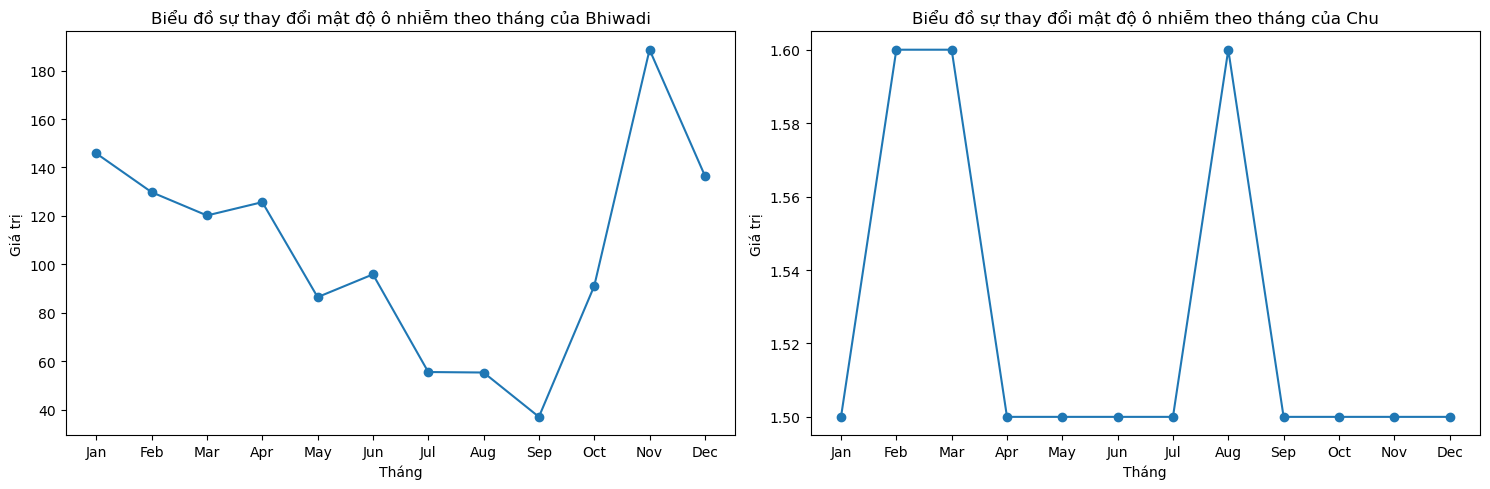

In [6]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] #Các tháng

plt.subplots(figsize=(15, 5))

# Bhiwadi
values1 = df.loc[df['City'] == 'Bhiwadi'][months].values[0] #Giá trị ứng với mỗi tháng

#Vẽ biểu đồ đường
plt.subplot(1, 2, 1)
plt.plot(months, values1, marker = 'o')

#Customize chart
plt.title('Biểu đồ sự thay đổi mật độ ô nhiễm theo tháng của Bhiwadi')
plt.xlabel('Tháng', fontsize = 10)
plt.ylabel('Giá trị',fontsize = 10)

# Chu
values2 = df.loc[df['City'] == 'Chu'][months].values[0] #Giá trị ứng với mỗi tháng

#Vẽ biểu đồ đường
plt.subplot(1, 2, 2)
plt.plot(months, values2, marker = 'o')

#Customize chart
plt.title('Biểu đồ sự thay đổi mật độ ô nhiễm theo tháng của Chu')
plt.xlabel('Tháng', fontsize = 10)
plt.ylabel('Giá trị',fontsize = 10)

plt.tight_layout()
plt.show()

***Nhận xét về biểu đồ***

2 biểu đồ trên ở cột giá trị đã cho thấy sự chênh lệch rất nhiều giữa 2 khoảng độ đo giá trị ô nhiễm giữa thành phố ô nhiễm nhất và sạch nhất.\
Chu có giá trị ô nhiễm tăng vào tháng 2, 3 và 8 nhưng giá trị tăng không đáng kể (0.1) nên chúng ta có thể bỏ qua việc giải thích biến động.\
Bhiwadi có sự biến đổi giá trị ô nhiễm tăng mạnh vào tháng 11 so với tháng khác trong năm nên ở đây có thể thử giải thích tại sao có sự biến động này.

**Giải thích:** Theo như sự tìm hiểu, vào tháng 11 ở Ấn độ (India) thường có nhiều lễ hội và ngày lễ được diễn ra, chính vì thế có khả năng trong những ngày lễ này các hoạt động phong tục truyền thống được tổ chức đã có những hoạt động làm hàm lượng nhiều loại chất khí gây hại cho môi trường từ đó làm giảm đi chất lượng không khí sạch, tăng chỉ số ô nhiễm lên một cách nhanh chóng.